In [62]:
import pandas as pd

df = pd.read_csv("mqtt_dataset_final_combined.csv") 
print(f"Original dataset size: {(df.shape)}")
df=df.drop_duplicates()
columns_to_drop=["tcp_FIN","tcp_PSH","clientid","mqtt.dupflag"]
df=df.drop(columns=columns_to_drop)
df = df.dropna()

print(f"Dataset size after removing duplicates and non-variable columns: {df.shape}")
df=df.sample(frac=1).reset_index(drop=True)  # Ανακάτεμα των γραμμών
print(df.columns)
df["tcp.time_delta"]=df["tcp.time_delta"].astype(float)
df.describe()
# df.info()
df

Original dataset size: (25111, 12)
Dataset size after removing duplicates and non-variable columns: (24003, 8)
Index(['tcp.time_delta', 'tcp.len', 'mqtt.retain', 'mqtt.qos', 'mqtt_len_log',
       'mqtt.payload_entropy', 'mqtt.topic.len', 'label'],
      dtype='object')


,tcp.time_delta,tcp.len,mqtt.retain,mqtt.qos,mqtt_len_log,mqtt.payload_entropy,mqtt.topic.len,label
0,4.998358,90.0,0.0,1.0,4.488636,4.715630,21.0,0.0
1,1.999168,88.0,0.0,1.0,4.465908,4.539035,21.0,1.0
2,0.999015,87.0,1.0,1.0,4.454347,4.538602,24.0,1.0
3,9.999260,90.0,0.0,1.0,4.488636,4.715630,21.0,0.0
4,2.970969,90.0,0.0,1.0,4.488636,4.703648,21.0,0.0
...,...,...,...,...,...,...,...,...
23998,9.996587,90.0,0.0,1.0,4.488636,4.747376,21.0,0.0
23999,4.999224,90.0,0.0,1.0,4.488636,4.659919,21.0,0.0
24000,6.888556,68.0,0.0,0.0,4.204693,4.341865,21.0,0.0
24001,9.999787,90.0,0.0,1.0,4.488636,4.671902,21.0,0.0


In [63]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()
print(f"Number of outliers in each column:\n{outliers.sum()}")

# for col in categorical_cols:
#     print(f"Value counts for column: {col}")
#     print(df[col].value_counts())

# print(df["tcp.flags"].value_counts())
# cat_cols_to_drop = ['mqtt.hdrflags','mqtt.msg']
# df = df.drop(columns=cat_cols_to_drop)



Number of outliers in each column:
tcp.time_delta          1161
tcp.len                 1649
mqtt.retain             1378
mqtt.qos                   0
mqtt_len_log            2418
mqtt.payload_entropy    2453
mqtt.topic.len          1166
label                      0
dtype: int64


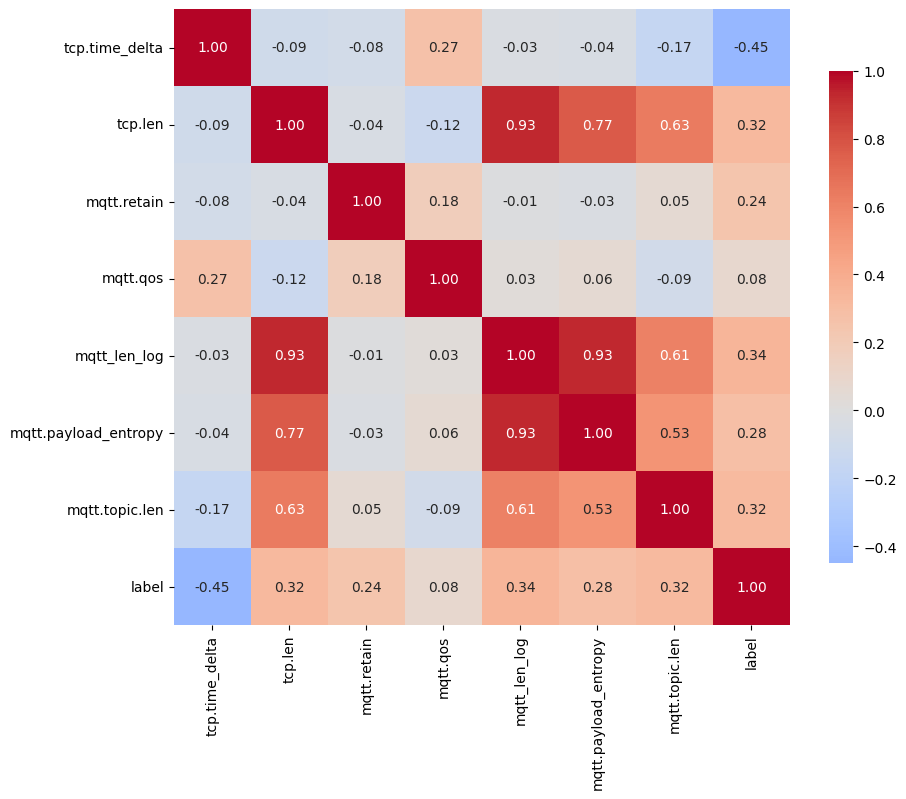

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.show()

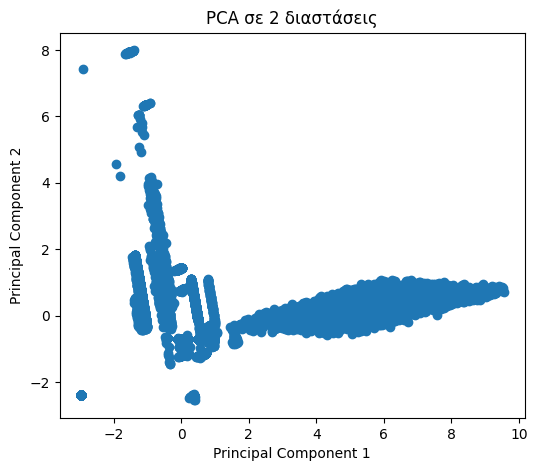

[0.42784906 0.18055776]
Συνολική εξηγούμενη διακύμανση: 0.60840681862094
Αριθμός ανιχνευμένων ανωμαλιών: 1201


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA σε 2 διαστάσεις")
plt.show()
print(pca.explained_variance_ratio_)
print("Συνολική εξηγούμενη διακύμανση:", pca.explained_variance_ratio_.sum())
X_recon = pca.inverse_transform(X_pca)

reconstruction_error = np.mean((X_scaled - X_recon) ** 2, axis=1)
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Αριθμός ανιχνευμένων ανωμαλιών: {np.sum(outliers)}")

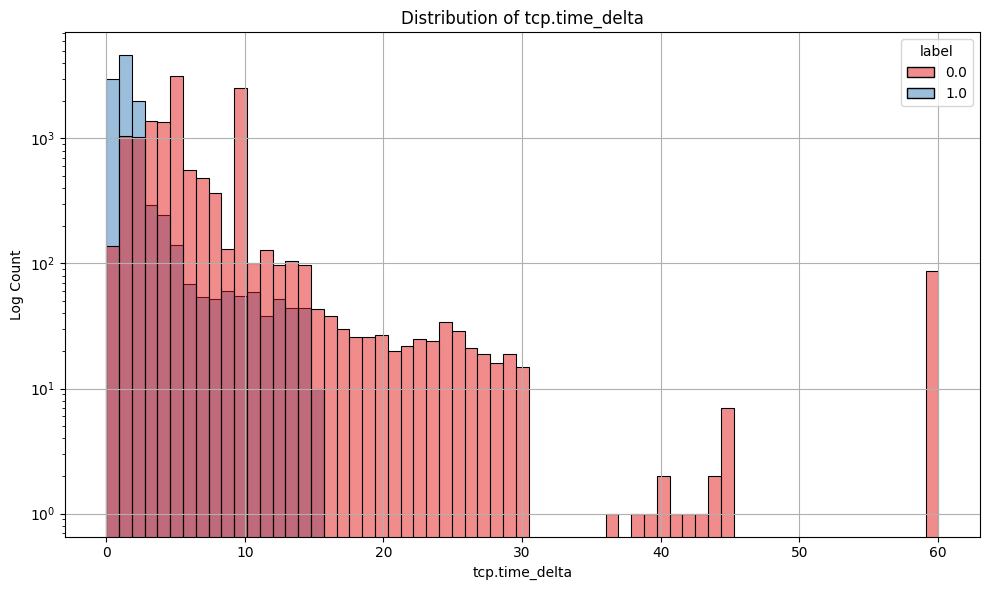

tcp.time_delta
0.500681     9
0.500886     8
0.500836     7
4.999191     7
0.500855     7
            ..
1.876064     1
14.397979    1
1.485954     1
12.993102    1
1.999168     1
Name: count, Length: 20292, dtype: int64


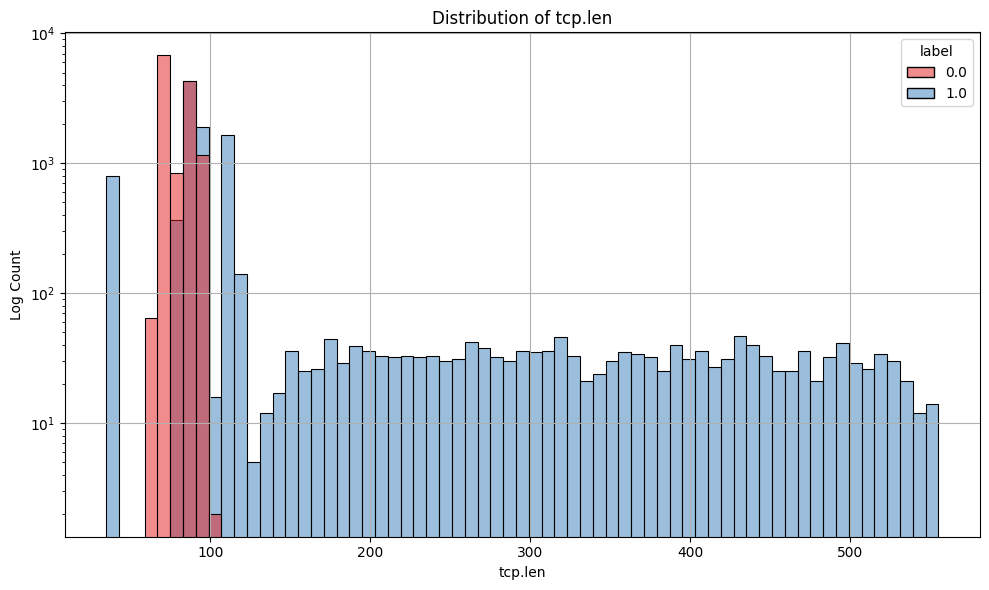

tcp.len
68.0     5122
90.0     3727
87.0     2083
92.0     1801
88.0     1166
         ... 
484.0       1
544.0       1
127.0       1
555.0       1
552.0       1
Name: count, Length: 457, dtype: int64


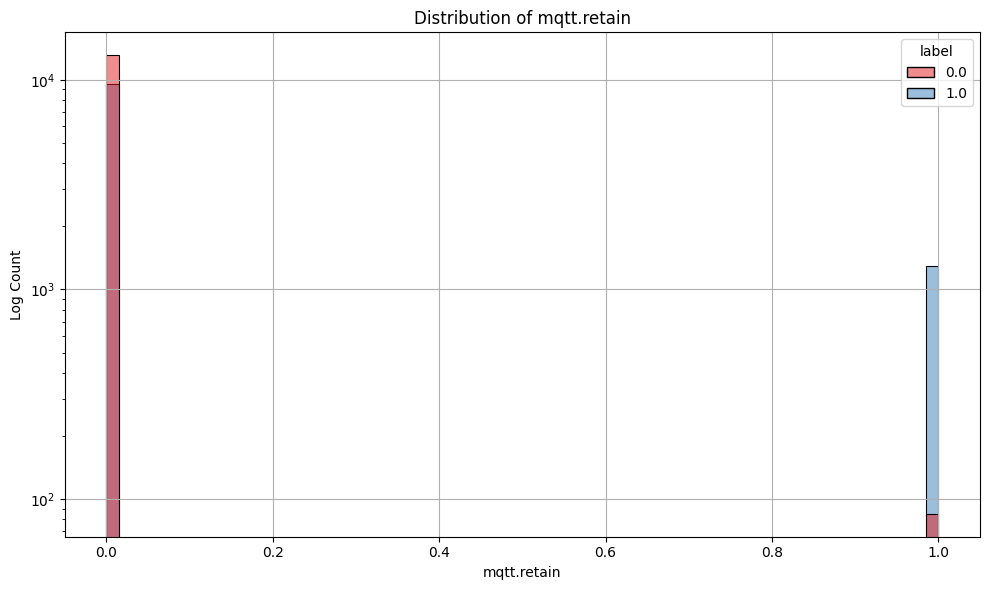

mqtt.retain
0.0    22625
1.0     1378
Name: count, dtype: int64


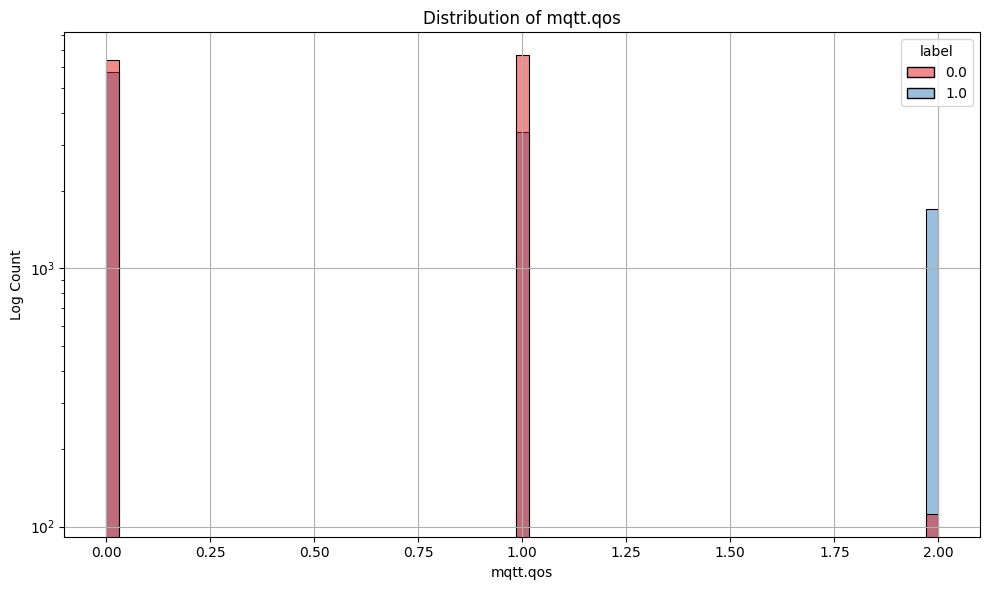

mqtt.qos
0.0    12140
1.0    10055
2.0     1808
Name: count, dtype: int64


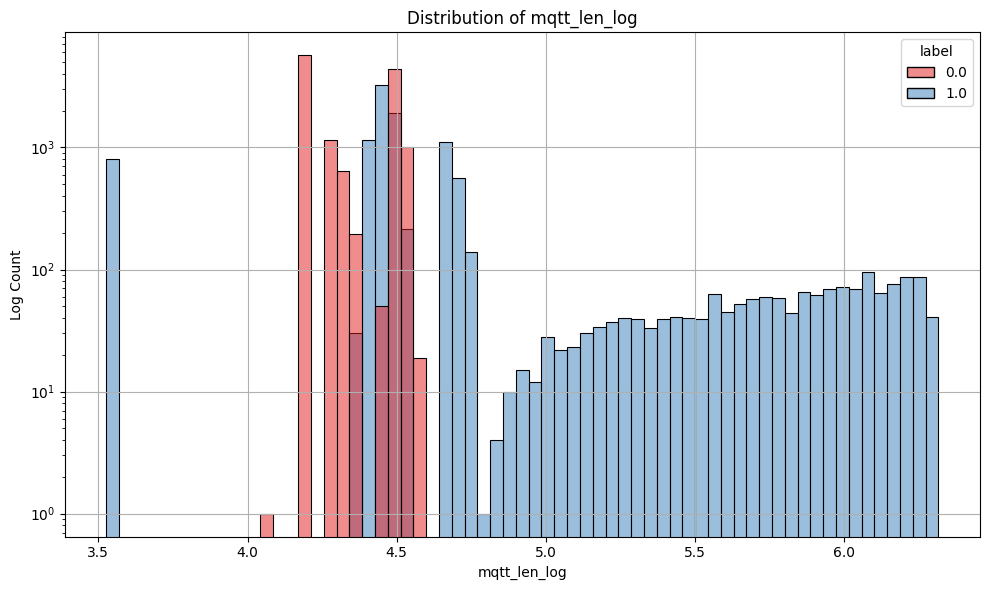

mqtt_len_log
4.204693    5122
4.488636    3727
4.454347    2083
4.510860    1801
4.465908    1166
            ... 
6.177944       1
6.295266       1
4.836282       1
6.315358       1
6.309918       1
Name: count, Length: 457, dtype: int64


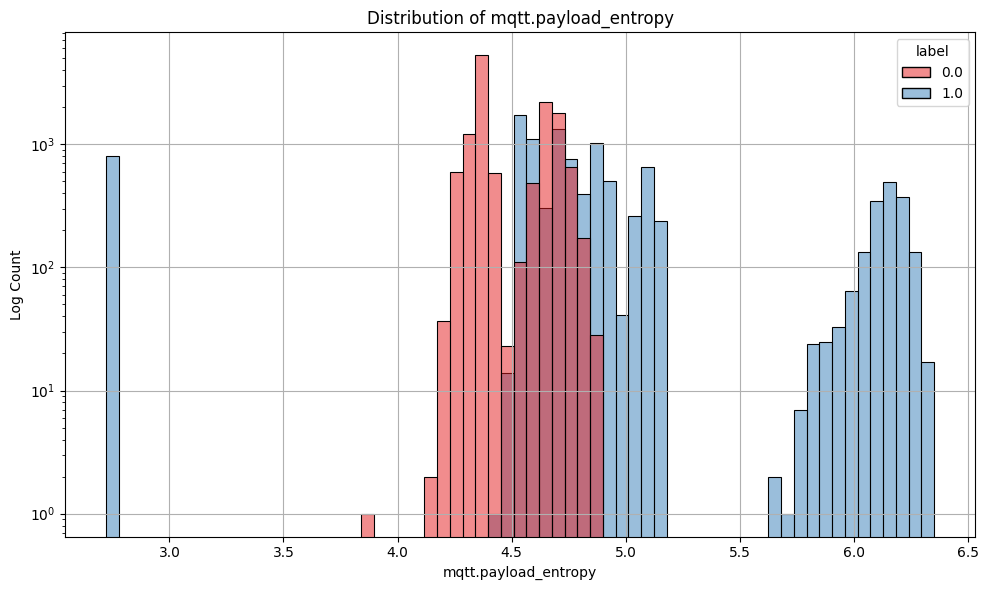

mqtt.payload_entropy
4.388377    2388
4.341865    1534
4.539035    1464
4.345176    1170
4.885255     828
            ... 
6.156671       1
5.111445       1
4.988275       1
6.114151       1
6.191024       1
Name: count, Length: 2372, dtype: int64


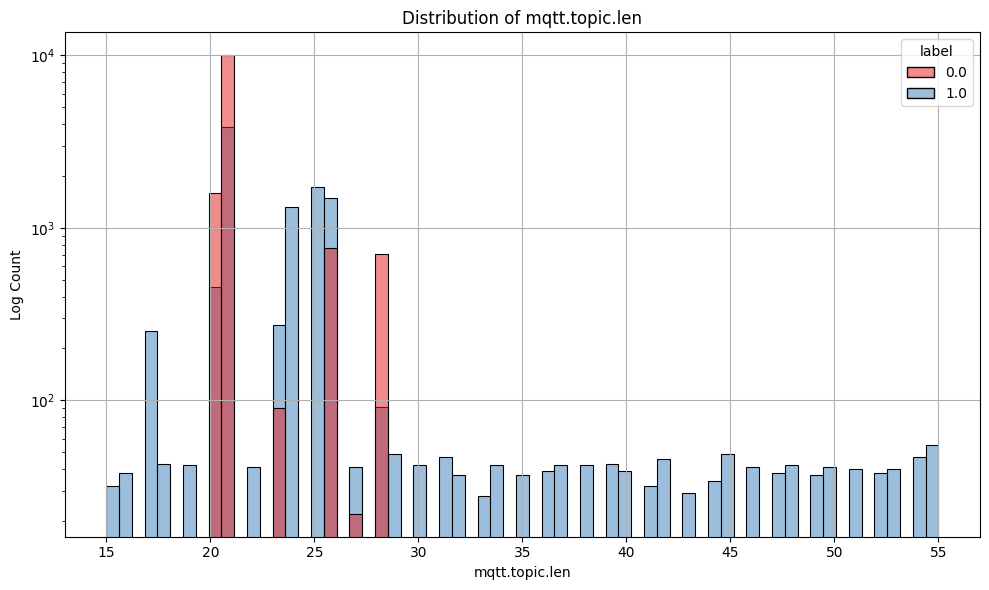

mqtt.topic.len
21.0    13888
26.0     2249
20.0     2041
25.0     1735
24.0     1323
28.0      796
23.0      364
17.0      252
27.0       63
55.0       55
29.0       49
45.0       49
54.0       47
31.0       47
42.0       46
39.0       43
18.0       43
34.0       42
48.0       42
38.0       42
30.0       42
19.0       42
37.0       42
46.0       41
50.0       41
22.0       41
51.0       40
53.0       40
36.0       39
40.0       39
52.0       38
16.0       38
47.0       38
35.0       37
49.0       37
32.0       37
44.0       34
15.0       32
41.0       32
43.0       29
33.0       28
Name: count, dtype: int64


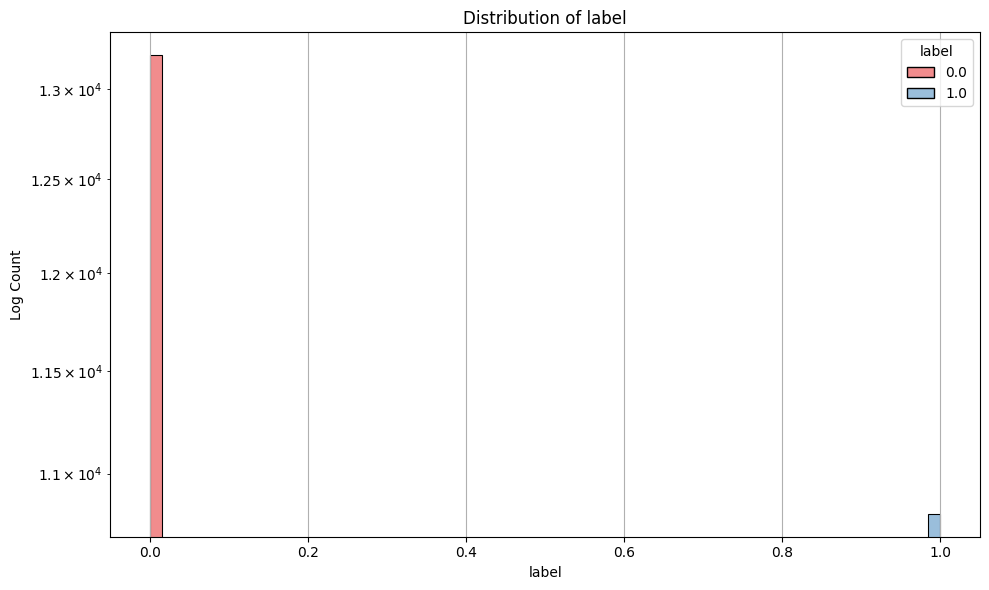

label
0.0    13193
1.0    10810
Name: count, dtype: int64


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



for col in df.select_dtypes(include=[np.number]).columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(
            data=df,
            hue ='label',
            x=col,
            bins=65,
            multiple='layer',     
            alpha=0.5,          
            palette='Set1',
            )
            plt.yscale('log')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Log Count')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            print(df[col].value_counts())
          

Accuracy: 0.9998611303985557

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3987
         1.0       1.00      1.00      1.00      3214

    accuracy                           1.00      7201
   macro avg       1.00      1.00      1.00      7201
weighted avg       1.00      1.00      1.00      7201



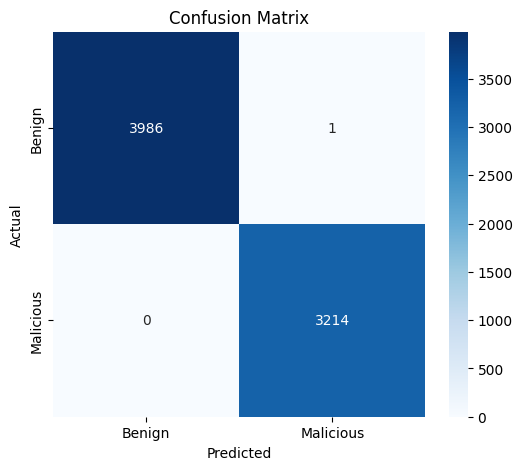

                Feature  Importance
0        tcp.time_delta    0.370689
4          mqtt_len_log    0.190765
1               tcp.len    0.189476
5  mqtt.payload_entropy    0.164016
6        mqtt.topic.len    0.043346
3              mqtt.qos    0.040987
2           mqtt.retain    0.000721


C:\Users\bleto\AppData\Local\Temp\ipykernel_16588\2831638950.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


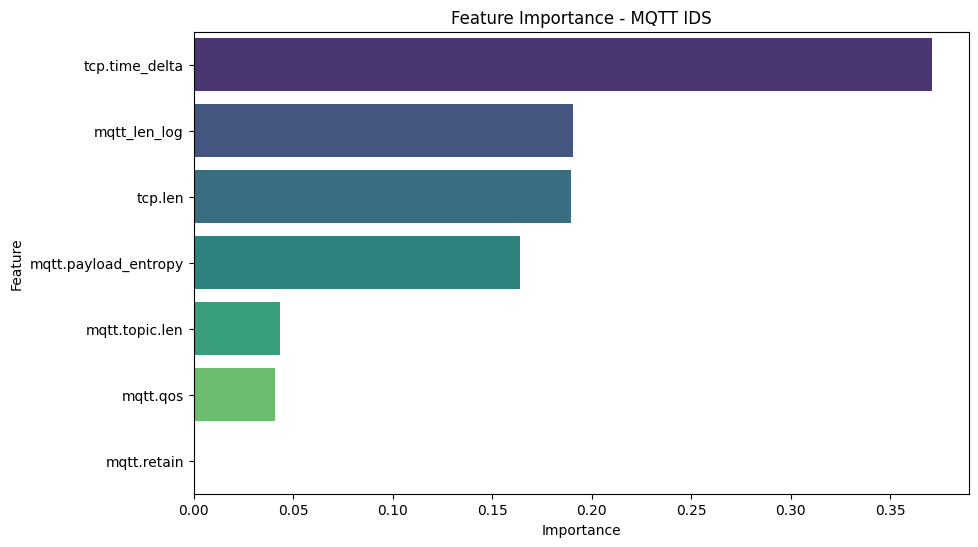

['rf_model.pkl']

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import joblib
from sklearn.ensemble import RandomForestClassifier
# Αποθήκευση του MLP μοντέλου

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.3, random_state=88)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# --- 4️⃣ Απλό MLPClassifier ---
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=5,
    max_features='sqrt',
    class_weight='balanced', # Πολύ σημαντικό αν έχεις λιγότερα Malicious από Benign
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# --- 6️⃣ Αξιολόγηση ---
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = ['Benign', 'Malicious']  # Αν θες όνομα κλάσεων


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
importances = rf_model.feature_importances_
feature_names = X_train.columns # Τα ονόματα των στηλών σου

# 2. Τα βάζουμε σε ένα DataFrame για να τα ταξινομήσουμε
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Εκτύπωση του πίνακα
print(feature_importance_df)

# 4. Οπτικοποίηση με Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - MQTT IDS')
plt.show()

# Αποθήκευση του StandardScaler
joblib.dump(rf_model, 'rf_model.pkl')
